In [1]:
########## GEMINI 行情接口 ##########
## https://api.gemini.com/v1/pubticker/:symbol
 
import json
import requests
 
gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
symbol = 'btcusd'
btc_data = requests.get(gemini_ticker.format(symbol)).json()
print(json.dumps(btc_data, indent=4))

{
    "bid": "8859.34",
    "ask": "8860.25",
    "volume": {
        "BTC": "2936.8484729604",
        "USD": "26171003.903164651031",
        "timestamp": 1588683600000
    },
    "last": "8857.22"
}


    CloseTime  OpenPrice  HighPrice  LowPrice  ClosePrice      Volume  \
0  1585087200    6759.20    6773.72   6641.17     6723.27   72.583128   
1  1585090800    6717.31    6811.00   6700.15     6788.60  220.946572   
2  1585094400    6786.20    6810.32   6738.07     6775.57  154.869199   
3  1585098000    6767.07    6767.07   6636.94     6726.11  232.859076   
4  1585101600    6716.79    6738.18   6615.00     6627.60   94.999224   

             NA  
0  4.886804e+05  
1  1.501590e+06  
2  1.049874e+06  
3  1.558001e+06  
4  6.339241e+05  


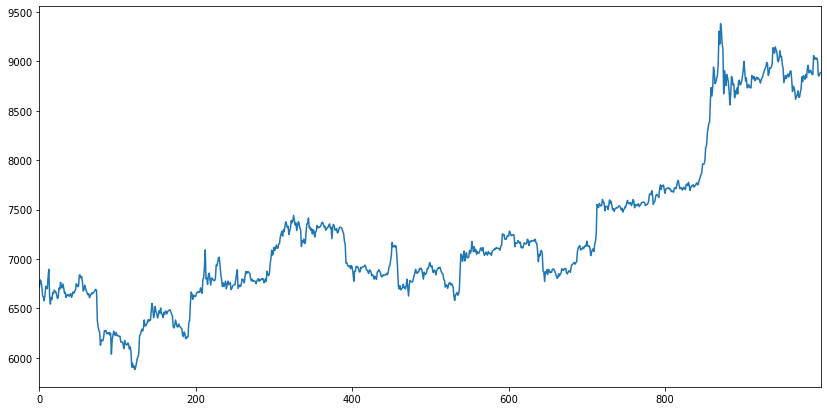

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# 选择要获取的数据时间段
periods = '3600'
 
# 通过 Http 抓取 btc 历史价格数据
resp = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc', 
  params={
    'periods': periods
  })
data = resp.json()
 
# 转换成 pandas data frame
df = pd.DataFrame(
  data['result'][periods], 
  columns=[
    'CloseTime',
    'OpenPrice',
    'HighPrice',
    'LowPrice',
    'ClosePrice',
    'Volume',
    'NA'])
 
# 输出 DataFrame 的头部几行
print(df.head())
 
# 绘制 btc 价格曲线
df['ClosePrice'].plot(figsize=(14, 7))

In [3]:
import requests
import json
import base64
import hmac
import hashlib
import datetime
import time
 
base_url = "https://api.sandbox.gemini.com"
endpoint = "/v1/order/new"
url = base_url + endpoint
 
gemini_api_key = "account-zmidXEwP72yLSSybXVvn"
gemini_api_secret = "375b97HfE7E4tL8YaP3SJ239Pky9".encode()
 
t = datetime.datetime.now()
payload_nonce = str(int(time.mktime(t.timetuple())*1000))
 
payload = {
   "request": "/v1/order/new",
   "nonce": payload_nonce,
   "symbol": "btcusd",
   "amount": "5",
   "price": "3633.00",
   "side": "buy",
   "type": "exchange limit",
   "options": ["maker-or-cancel"]
}
 
encoded_payload = json.dumps(payload).encode()
b64 = base64.b64encode(encoded_payload)
signature = hmac.new(gemini_api_secret, b64, hashlib.sha384).hexdigest()
 
request_headers = {
    'Content-Type': "text/plain",
    'Content-Length': "0",
    'X-GEMINI-APIKEY': gemini_api_key,
    'X-GEMINI-PAYLOAD': b64,
    'X-GEMINI-SIGNATURE': signature,
    'Cache-Control': "no-cache"
}
 
response = requests.post(url,
                         data=None,
                         headers=request_headers)
 
new_order = response.json()
print(new_order)

{'result': 'error', 'reason': 'InsufficientFunds', 'message': "Failed to place buy order on symbol 'BTCUSD' for price $3,633.00 and quantity 5 BTC due to insufficient funds"}


In [6]:
import requests
import timeit
 
 
def get_orderbook():
  orderbook = requests.get("https://api.gemini.com/v1/book/btcusd").json()
 
 
n = 10
latency = timeit.timeit('get_orderbook()', setup='from __main__ import get_orderbook', number=n) * 1.0 / n
print('Latency is {} ms'.format(latency * 1000))

Latency is 11963.129930000014 ms
